<a href="https://colab.research.google.com/github/marioTavFer/somePython/blob/main/graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A gramática dos gráficos: como deixar de criar gráficos no Excel e usar o plotnine no Python
# Introdução

A etapa de visualização de dados refere-se a uma parte fundamental da análise de dados, pois permite não somente compreender os dados que estamos analisando, mas como também é uma ferramenta útil para explanar os resultados encontrados. Mas qual a forma mais fácil de construir um gráfico, como podemos melhorar a produtividade nesta tarefa? É onde podemos aplicar a gramática dos gráficos e construir com a biblioteca plotnine no Python.

# Gramática dos Gráficos

A ideia da "gramática dos gráficos" foi popularizada por Leland Wilkinson em seu livro "The Grammar of Graphics", publicado em 1999. Neste livro, Wilkinson apresenta uma abordagem teórica para a criação de gráficos estatísticos, propondo uma estrutura unificada para representar uma ampla variedade de gráficos estatísticos e de visualização de dados.

O termo se refere aos elementos e princípios fundamentais que constituem um gráfico. Assim como a gramática de uma língua ajuda a organizar e comunicar informações de maneira clara e coerente, a gramática dos gráficos faz o mesmo para representações visuais de dados.

Para construir um gráfico, conforme Wilkinson, deve-se basear nos seguintes componentes:

  - Dados: Todo gráfico começa com dados. A escolha dos dados certos é fundamental para a criação de uma visualização significativa.

  - Atributos visuais (aesthetics): A gramática dos gráficos identifica esses atributos e como eles podem ser mapeados para os dados.
  
  - Geometrias: As geometrias são as formas visuais usadas para representar os dados, como pontos, linhas, barras e áreas.
    
  - Sinais estatísticos: Sinais estatísticos, como médias, medianas e desvios padrão, podem ser adicionados aos gráficos para fornecer informações adicionais sobre os dados.       
    
  - Facetas: As facetas são usadas para dividir os dados em subconjuntos e representá-los em painéis separados. Isso pode ser útil para explorar padrões em dados multidimensionais.

  - Coordenadas: As coordenadas definem como os dados são mapeados nos elementos visuais. Deve ser cartersiano ou polar?
  
  - Temas: Descreve toda a parte não relacionada aos dados do gráficos.

## ggplot2 vs. plotnine

A gramática dos gráficos ganhou grande destaque em aplicações de análise de dados, e é impossível não mencionar que foi popularizada por Hadley Wickham com a criação do pacote ggplot2 na linguagem de programação R.

O ggplot2 revolucionou a visualização de dados na linguagem, seguindo a abordagem da gramática dos gráficos, onde os gráficos são construídos a partir de camadas (layers), geometrias (geoms) e mapeamentos estéticos (aesthetics).

Na comunidade do Python, houve a criação de bibliotecas bastante conhecidas, como matplotlib e seaborn. Entretanto, elas não foram tão difundidas no contexto da aplicação da gramática dos gráficos. Esse papel foi desempenhado pelo plotnine, uma biblioteca inspirada (ou mesmo uma cópia perfeita para o Python) do ggplot2.

O plotnine permite a construção de gráficos adicionando camadas, geometrias e mapeamentos estéticos. Isso facilita a criação de visualizações complexas e personalizadas.

## Passo 01: Instalar bibliotecas

Vamos agora realizar o procedimento de construir gráficos usando o plotnine no Python. Para tanto, é necessário instalar e importar os módulos da biblioteca.

In [ ]:
# !pip install plotnine
import plotnine as p9

## Passo 02: dados de exemplo

Vamos importar os dados `mtcars` que contém várias características de carros, como cilindros, cavalos de potência, consumo de combustível e muito mais.

In [ ]:
# Importa os dados do módulo data
from plotnine.data import mtcars

# Exibe o dataframe
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Passo 03: criando o gráfico com o plotnine

Com os dados em mãos, devemos definir cada etapa do processo de criação do gráfico conforme a gramática dos gráficos usando o plotnine. Primeiro, devemos abrir o parêntese `()` e definir toda a construção do gráfico em seu interior. Definimos os dados, inserindo com a função principal `p9.ggplot()` o dataframe `mtcars` e mapeamos os eixos x e y com a função `p9.aes()`. Lembramos que aqui as camadas são "somadas", ou seja, juntadas pelo símbolo +.

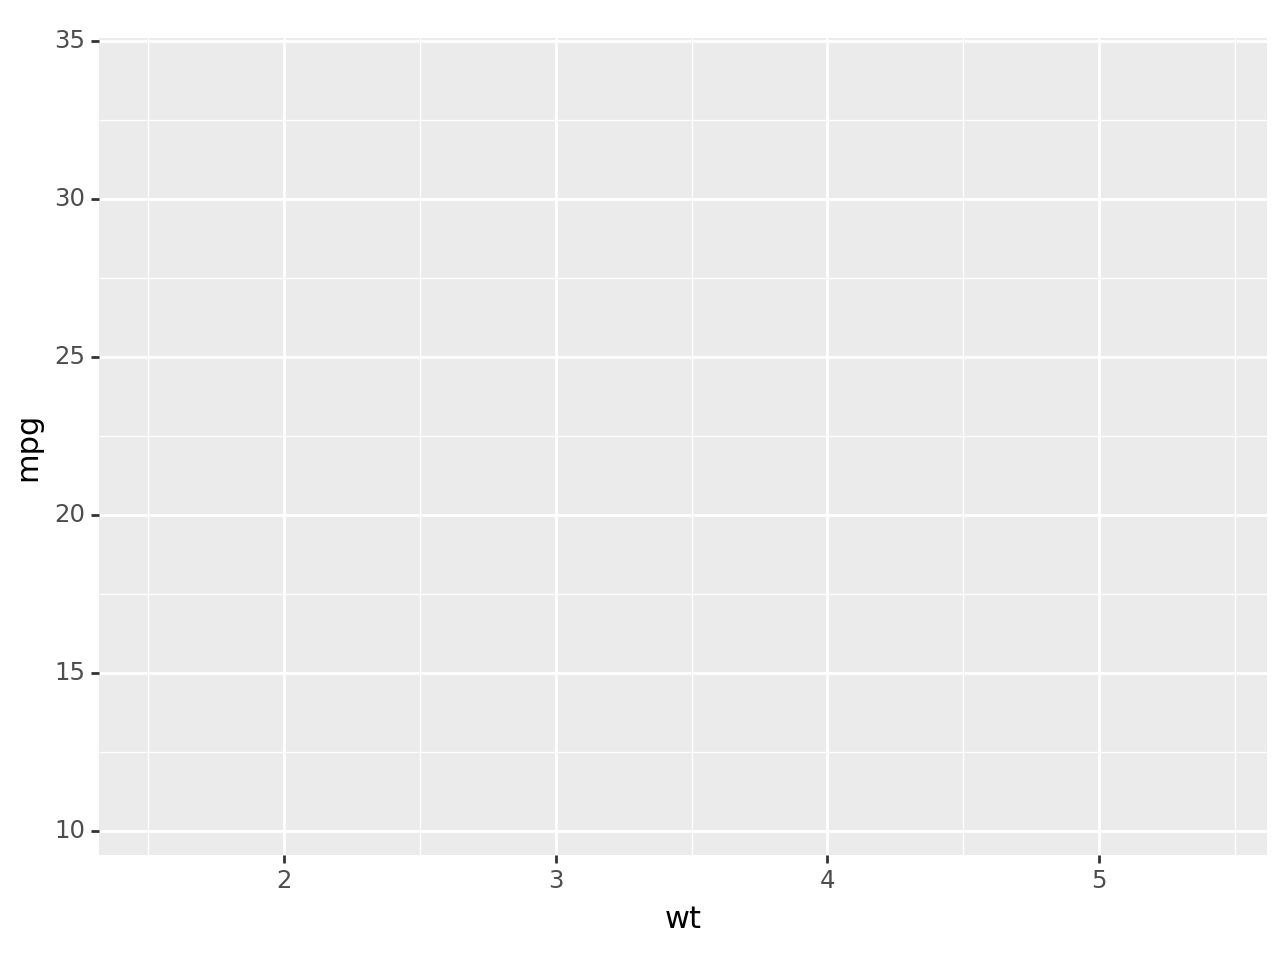

<Figure Size: (640 x 480)>

In [ ]:
(p9.ggplot(mtcars) +
  p9.aes(x = "wt", y = "mpg")
  )

Veja que o resultado está mapeando os dados; entretanto, ainda faltam alguns elementos. Para adicionar a geometria, aplicamos a função característica daquela que desejamos. Vamos aplicar um gráfico de dispersão com `geom_point()`.

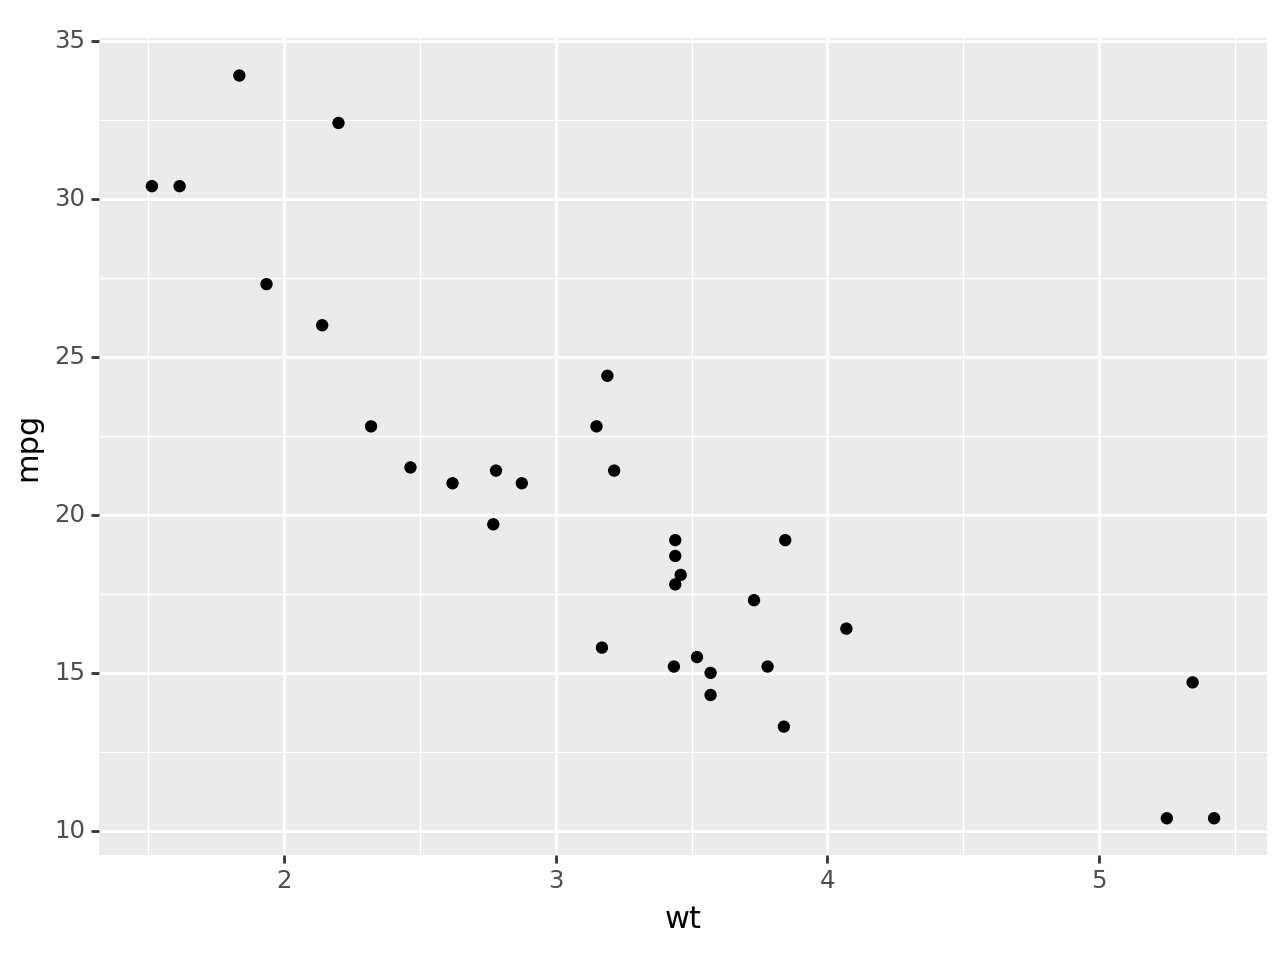

<Figure Size: (640 x 480)>

In [ ]:
(p9.ggplot(mtcars) +
  p9.aes(x = "wt", y = "mpg") +
  p9.geom_point()
  )

Podemos continuar definindo elementos estatísticos adicionais. No caso, construímos uma reta de regressão com a camada `stat_smooth(method="lm")`. Também realizamos o facetamento dos dados com `facet_wrap` através da coluna "gear". Para auxiliar na diferenciação das variáveis, adicionamos as cores de cada variável com a função `aes`. Para finalizar, aplicamos um tema pré-definido, `theme_minimal`, e inserimos um título com a função `labs`.

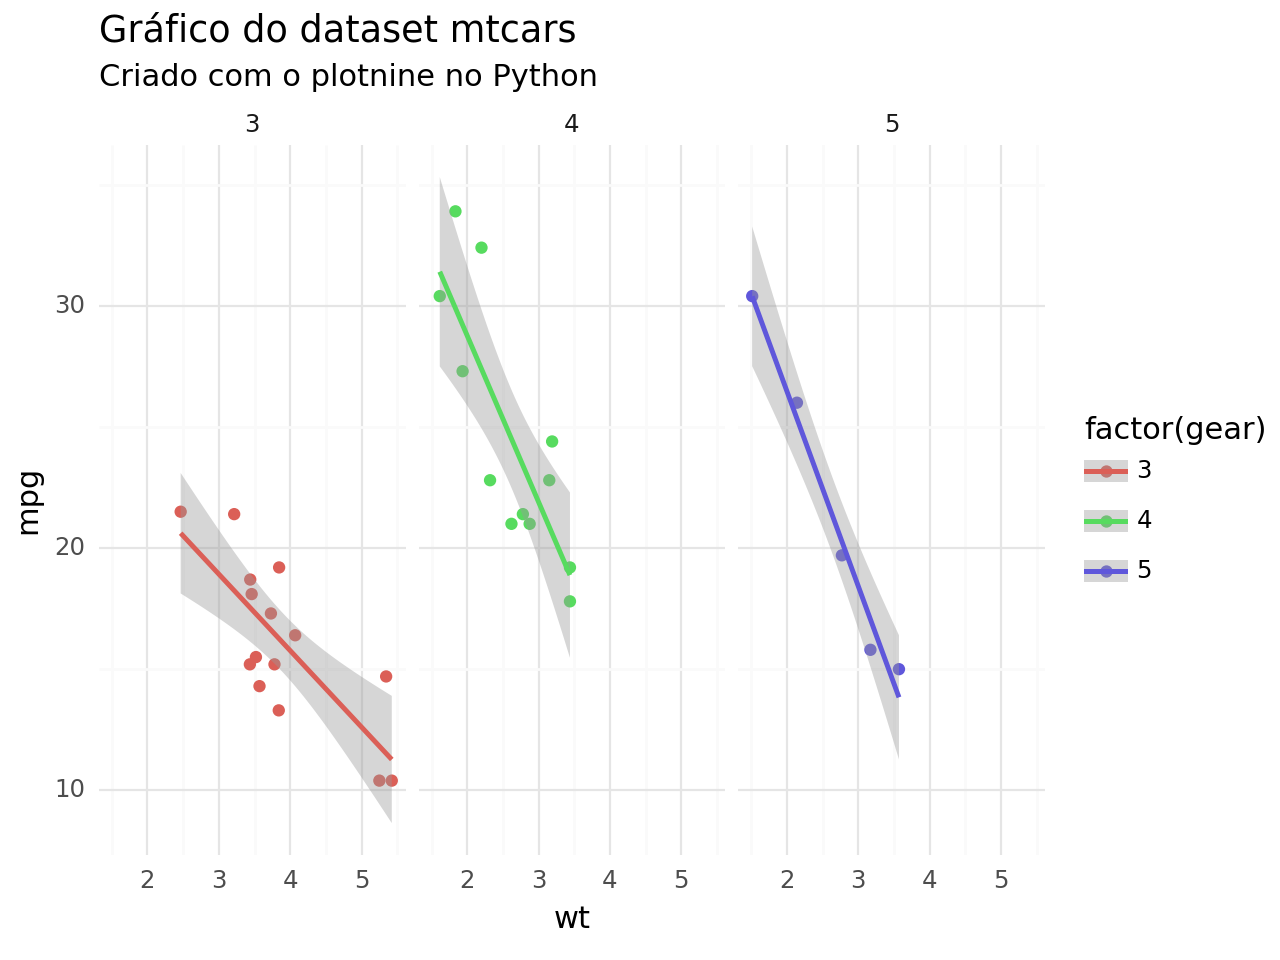

<Figure Size: (640 x 480)>

In [ ]:
(p9.ggplot(mtcars) +
  p9.aes(x = "wt", y = "mpg", color = "factor(gear)") +
  p9.geom_point() +
  p9.stat_smooth(method = "lm") +
  p9.facet_wrap("gear") +
  p9.theme_minimal() +
  p9.labs(title = "Gráfico do dataset mtcars",
          subtitle = "Criado com o plotnine no Python")
  )

## Referências

Wilkinson, L. (2005), The Grammar of Graphics , Springer .


Kibirige, Hassan. (2024) Plotnine: A Grammar of Graphics for Python. Acesso em: https://plotnine.org/